# Download FUNDA from WRDS and anonomyze

In [1]:
%run imports.ipynb

Set LOG_LEVEL="INFO" before running the import file to get moar output.
Set LOG_FORMAT to change log format.
Numpy (np): 2.3.1
Scipy (sp, stats): 1.16.0
Pandas (pd): 2.3.1
MatPlotLib (mpl, plt): 3.10.3
Seaborn (sns): 0.13.2
Scikit-Learn (sk): 1.7.1
Statsmodels (sm): 0.14.5
Patsy (pt): 1.0.1
SQLAlchemy (sa): 2.0.41
ROOT_DIR: 5150_Analytics
CODE_DIR: 5150_Analytics\code
DATA_DIR: 5150_Analytics\data
FIG_DIR: 5150_Analytics\code\figures


In [2]:
from src import compustat

In [3]:
df = compustat.CompustatAnnual().data

In [4]:
df.head()

,firm_id,tic,name,fyear,fiscal_year_end_month,age_days,at,act,lt,lct,invt,ap,rect,recd,total_debt,che,re,oancf,ebit,ebitda,ni,ib,pi,sale,revt,epspi,epspx,xad,xrd,xsga,xint,capx,cogs,dvt,emp,share_price,shares_outstanding,mve,seq,bve,bign,auditor,auop,auopic,gics_group,gics_industry,gics_sector,gics_subindustry,gics_sector_name
0,0,ATVK,AMERITEK VENTURES,2012,5,365,0.018,0.005,0.049,0.049,0,0.002,0,0,0.025,0.005,-0.228,-0.015,-0.056,-0.055,-0.061,-0.061,-0.061,0,0,0,0,0,NaN,0.055,0.005,0,0,0,0.001,0.350,66.500,23.275,-0.031,-0.031,0,Other,4,0,NaN,NaN,NaN,NaN,NaN
1,0,ATVK,AMERITEK VENTURES,2013,5,730,0,0,0.047,0.047,0,0.012,0,0,0,0,-0.294,-0.010,-0.052,-0.051,-0.067,-0.067,-0.067,0,0,0,0,0,0,0.051,0.003,0,0,0,0.001,0.600,66.500,39.900,-0.047,-0.047,0,Other,4,0,"2,510","251,010",25,"25,101,010",Consumer Discretionary
2,0,ATVK,AMERITEK VENTURES,2014,5,1095,0.264,0,0.062,0.062,0,0.004,0,0,0,0,-0.295,-0.038,-0.015,-0.015,-0.001,-0.001,-0.001,0,0,0,0,0,0,0.015,0,0,0,0,0.001,0.600,69,41.400,0.202,0.202,0,Other,4,0,NaN,NaN,NaN,NaN,NaN
3,0,ATVK,AMERITEK VENTURES,2015,5,1461,0,0,0.081,0.081,0,0.023,0,0,0,0,-0.458,-0.002,-0.019,-0.019,-0.163,-0.163,-0.163,0,0,-0.020,-0.020,0,0,0.019,0,0,0,0,0.001,0.240,6.900,1.656,-0.081,-0.081,0,Other,4,0,NaN,NaN,NaN,NaN,NaN
4,0,ATVK,AMERITEK VENTURES,2016,5,1826,0,0,0.094,0.094,0,0.023,0,0,0,0,-0.471,-0.020,-0.013,-0.013,-0.013,-0.013,-0.013,0,0,0,0,0,0,0.013,0,0,0,0,0.002,1.250,7.230,9.037,-0.094,-0.094,0,Other,4,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,firm_id,fyear,fiscal_year_end_month,age_days,at,act,lt,lct,invt,ap,rect,recd,total_debt,che,re,oancf,ebit,ebitda,ni,ib,pi,sale,revt,epspi,epspx,xad,xrd,xsga,xint,capx,cogs,dvt,emp,share_price,shares_outstanding,mve,seq,bve,bign,auop,auopic,gics_group,gics_industry,gics_sector,gics_subindustry
count,"200,438","200,438","200,438","200,438","200,438","165,167","200,133","165,764","198,199","199,407","197,925","117,148","200,438","200,415","195,626","195,484","199,060","194,293","199,719","199,726","199,725","199,718","199,718","199,147","199,147","67,157","92,336","167,934","171,479","194,615","199,720","198,830","174,619","200,438","199,999","200,438","200,427","200,421","200,438","195,596","160,979","194,482","194,482","194,482","194,482"
mean,"11,361","2,011",10.383,"5,853","12,058","1,314","9,978","1,030",540.766,"3,631","3,989",39.042,"3,219","1,425","1,048",464.143,445.665,627.077,212.541,208.951,302.424,"3,163","3,163",-2.330,-2.362,87.463,150.567,535.967,111.693,218.929,"2,090",105.456,9.422,31.968,202.707,"4,711","1,968","1,968",0.604,1.972,0.502,"3,145","314,492",31.274,"31,449,222"
std,"6,401",7.257,3.092,"5,228","104,538","6,555","97,866","5,769","8,233","48,724","53,531",605.733,"44,307","17,575","9,282","3,364","2,892","3,496","1,767","1,722","2,233","15,878","15,878","1,180","1,180",483.926,"1,046","2,848","1,424","1,333","11,759",715.239,43.071,725.522,"3,778","32,047","10,312","10,312",0.489,1.409,0.552,"1,276","127,575",12.752,"12,757,484"
min,0,"2,000",1,0,0,-7.760,-0.103,0,0,0,-0.167,-0.884,-110,-25,"-143,336","-110,560","-80,053","-76,735","-99,289","-99,289","-108,761","-24,955","-24,955","-437,648","-437,648",-1.167,-16.921,-223,"-3,775","-3,258","-23,105",-709,0,0,0,0,"-86,154","-86,154",0,0,0,"1,010","101,010",10,"10,101,010"
25%,"5,672","2,005",10,"2,191",34.939,9.622,10.801,4.711,0,1.422,1.593,0.025,0.573,3.256,-71.507,-1.309,-2.974,-1.519,-6.729,-6.585,-6.543,10.290,10.290,-0.240,-0.240,0.246,0.171,6.798,0.091,0.218,5.701,0,0.075,1.480,14.767,30.294,13.194,13.194,0,1,0,"2,010","201,070",20,"20,107,010"
50%,"11,812","2,011",12,"4,108",305.342,76.430,130.502,32.944,1.566,12.206,26.538,0.618,29,28.300,-3.290,8.093,5.923,11.391,1.383,1.325,1.897,115.901,115.901,0.080,0.080,1.867,5.279,31.020,2.195,3.794,58.895,0,0.499,8.820,38.992,199.618,103.957,103.950,1,1,0,"3,510","351,010",35,"35,101,020"
75%,"17,121","2,018",12,"8,035","1,942",437.932,"1,185",236.098,44.241,142.215,256.500,4.772,458.817,162.047,132.706,117.720,100.192,149.900,47.144,46.304,63.754,918.143,918.143,1.310,1.290,18.249,36.109,168,30.468,41.436,529.102,9.266,3.677,24.990,102.869,"1,383",623.562,623.500,1,4,1,"4,030","403,010",40,"40,301,040"
max,"21,262","2,024",12,"27,303","4,349,731","264,889","4,255,074","329,795","530,917","2,462,303","4,150,750","74,652","4,228,097","1,058,786","692,634","231,786","141,290","141,290","104,821","104,821","123,485","680,985","680,985","26,684","26,684","21,400","88,544","242,315","137,861","82,999","498,780","100,117","2,545","141,600","695,261","3,522,211","649,368","649,368",1,5,4,"6,020","602,010",60,"60,201,040"


In [6]:
df.auditor.value_counts()

auditor
Other                              54421
Ernst & Young                      33299
PricewaterhouseCoopers             31574
KPMG                               27954
Deloitte & Touche                  25739
Grant Thornton                      7728
BDO International                   6511
RSM                                 2666
Arthur Andersen                     2438
Crowe Horwath                       2259
Moss Adams                          1284
BKD LLP                              848
Unaudited                            652
EisnerAmper LLP                      641
CohnReznick LLP                      563
Moore Stephens                       541
Plante & Moran                       461
PKF International                    395
Cherry Bekaert LLP                   331
CliftonLarsonAllen LLP               112
Altschuler, Melvoin and Glasser       12
Coopers & Lybrand                      4
Touche Ross                            3
Spicer & Oppenheim                     2
Name: co

In [7]:
df.gics_sector_name.value_counts()

gics_sector_name
Financials                    33745
Information Technology        30434
Health Care                   27140
Consumer Discretionary        23808
Industrials                   22957
Materials                     20878
Energy                        15636
Consumer Staples               7666
Telecommunication Services     5333
Utilities                      4109
Name: count, dtype: int64

<Axes: xlabel='fyear', ylabel='bve'>

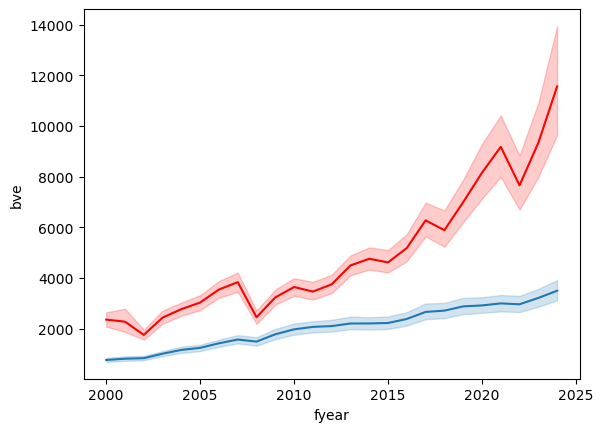

In [9]:
ax = sns.lineplot(data=df, x='fyear', y='bve')
sns.lineplot(data=df, x='fyear', y='mve', color='red', ax=ax)